In [468]:
from importlib import reload

import cfGPR
import vonkarman as vk
import plotGPR

import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as c

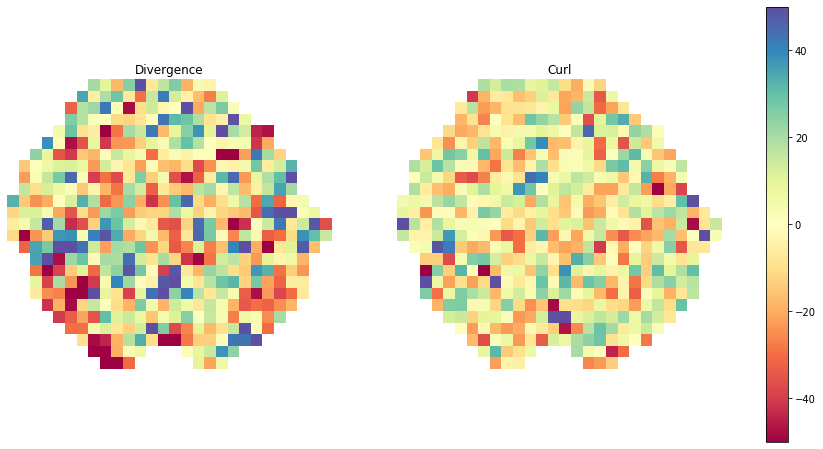

In [492]:
reload(plotGPR)

def DivCurl(
        x, y, dx, dy, err,
        x2=None, y2=None, dx2=None, dy2=None, err2=None,
        title1="Observed", title2="GPR Applied",
        minPoints=100,
        pixelsPerBin=1000,
        maxErr=50*u.mas,
        scale=50,
        savedir=None
):

    x, y, dx, dy, errors, cellSize = \
        plotGPR.calcPixelGrid(
            x, y, dx, dy, err,
            minPoints=minPoints,
            pixelsPerBin=pixelsPerBin,
            maxErr=maxErr)
    RMS_x = f"RMS x: {np.round(errors[0].value, 1)} {errors[0].unit}"
    RMS_y = f"RMS y: {np.round(errors[1].value, 1)} {errors[1].unit}"
    noise = f"Noise: {np.round(errors[2].value, 1)} {errors[2].unit}"

    div, curl = plotGPR.calcDivCurl(x, y, dx, dy)
    
    if np.all([arr is not None for arr in [x2, y2, dx2, dy2, err2]]):
        x2, y2, dx2, dy2, errors2, cellSize2 = \
            plotGPR.calcPixelGrid(
                x2, y2, dx2, dy2, err2,
                minPoints=minPoints,
                pixelsPerBin=pixelsPerBin,
                maxErr=maxErr)
        RMS_x2 = f"RMS x: {np.round(errors2[0].value, 1)} {errors2[0].unit}"
        RMS_y2 = f"RMS y: {np.round(errors2[1].value, 1)} {errors2[1].unit}"
        noise2 = f"Noise: {np.round(errors2[2].value, 1)} {errors2[2].unit}"
        
        div2, curl2 = plotGPR.calcDivCurl(x2, y2, dx2, dy2)
        
        fig, axes = plt.subplots(
            nrows=2, ncols=2,
            sharex=True, sharey=True,
            figsize=(16, 16))
#         fig.subplots_adjust(wspace=0)
        fig.subplots_adjust(hspace=0)
        
        divplot = axes[0, 0].imshow(
            div,
            origin="lower",
            cmap="Spectral",
            vmin=-scale,
            vmax=scale)
        axes[0, 0].axis("off")
        axes[0, 0].set_title("Divergence")
        curlplot = axes[0, 1].imshow(
            curl,
            origin="lower",
            cmap="Spectral",
            vmin=-scale,
            vmax=scale)
        axes[0, 1].axis("off")
        axes[0, 1].set_title("Curl")
        
        divplot = axes[1, 0].imshow(
            div2,
            origin="lower",
            cmap="Spectral",
            vmin=-scale,
            vmax=scale)
        axes[1, 0].axis("off")
        axes[1, 0].set_title("Divergence")
        curlplot = axes[1, 1].imshow(
            curl2,
            origin="lower",
            cmap="Spectral",
            vmin=-scale,
            vmax=scale)
        axes[1, 1].axis("off")
        axes[1, 1].set_title("Curl")
        
        fig.colorbar(divplot, ax=fig.get_axes())
        
    else:
        fig, axes = plt.subplots(
            nrows=1, ncols=2,
            sharex=True, sharey=True,
            figsize=(16, 8))

        divplot = axes[0].imshow(
            div,
            origin="lower",
            cmap="Spectral",
            vmin=-scale,
            vmax=scale)
        axes[0].axis("off")
        axes[0].set_title("Divergence")
        curlplot = axes[1].imshow(
            curl,
            origin="lower",
            cmap="Spectral",
            vmin=-scale,
            vmax=scale)
        axes[1].axis("off")
        axes[1].set_title("Curl")
        
        fig.colorbar(divplot, ax=fig.get_axes())

#     if save:
#         plt.savefig(os.path.join(self.outdir, ext + "div_curl.pdf"))

#     plt.show()

#     # Some stats:
#     vardiv = gbutil.clippedMean(div[div==div],5.)[1]
#     varcurl = gbutil.clippedMean(curl[div==div],5.)[1]
#     print("RMS of div: {:.2f}; curl: {:.2f}".format(np.sqrt(vardiv), np.sqrt(varcurl)))

reload(plotGPR)
GP = np.load("../vkexposures/450/450.npz")
DivCurl(
        GP["Xtest"][:, 0]*u.deg,
        GP["Xtest"][:, 1]*u.deg,
        GP["Ytest"][:, 0]*u.mas,
        GP["Ytest"][:, 1]*u.mas,
        GP["Etest"][:, 0]*u.mas,
#         x2=GP["Xtest"][:, 0]*u.deg,
#         y2=GP["Xtest"][:, 1]*u.deg,
#         dx2=GP["Ytest"][:, 0]*u.mas - GP["fbar_s"][:, 0]*u.mas,
#         dy2=GP["Ytest"][:, 1]*u.mas - GP["fbar_s"][:, 1]*u.mas,
#         err2=GP["Etest"][:, 0]*u.mas,
#         savedir="."
        pixelsPerBin=1000
    )

In [479]:
gp = cfGPR.CurlFreeGPR()

RMSx, RMSy, noise: 14.095285968175011 14.707538934706172 0.750386197037176


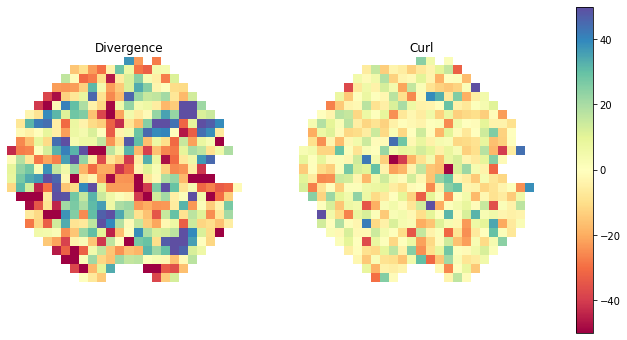

RMS of div: 30.53; curl: 14.98


In [480]:
gp.plot_div_curl(GP['Xtest'], GP['Ytest'], GP['Etest'])